### CV PROJECT

Install Libraries

In [9]:
!pip install vit-keras


In [10]:
!pip install tensorflow-addons


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from vit_keras import vit

In [12]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, InceptionV3, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Download the Data

In [14]:
# Load the CSV file with image names and numerical labels
csv_path = '/content/drive/My Drive/sight_insight_dataset/train.csv'
df = pd.read_csv(csv_path)

In [15]:

# Convert 'diagnosis' column to string
df['diagnosis'] = df['diagnosis'].astype(str)



In [16]:
# Define path to the image folder
data_folder = '/content/drive/My Drive/sight_insight_dataset/colored_images'



In [17]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


Pre-Processing Data

In [18]:
# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Split data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Create a label encoder
label_encoder = LabelEncoder()
label_encoder.fit(df['diagnosis'])

# Define parameters
image_size = (224, 224)
num_classes = len(label_encoder.classes_)
batch_size = 32

In [19]:

train_generator = datagen.flow_from_directory(
    directory=data_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 2931 images belonging to 5 classes.


In [20]:
# Create a generator for validation data
validation_generator = datagen.flow_from_directory(
    directory=data_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 5 classes.


In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(model, generator):
   # Get true labels and predictions
    val_labels = np.concatenate([validation_generator.next()[1] for _ in range(validation_generator.__len__())])
    val_labels = np.argmax(val_labels, axis=1)
    val_preds = model.predict(validation_generator)
    val_preds = np.argmax(val_preds, axis=1)

    # Confusion matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print('Classification Report')
    report = classification_report(val_labels, val_preds, target_names=validation_generator.class_indices.keys(), zero_division=0)
    print(report)


APPLYING DIFFERENT MODELS

VGGNET16

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/5
92/92 [==============================] - 87s 658ms/step - loss: 1.6702 - accuracy: 0.4449 - val_loss: 1.3058 - val_accuracy: 0.4938
Epoch 2/5
92/92 [==============================] - 42s 456ms/step - loss: 1.3282 - accuracy: 0.4869 - val_loss: 1.3250 - val_accuracy: 0.4938
Epoch 3/5
92/92 [==============================] - 42s 457ms/step - loss: 1.3324 - accuracy: 0.4852 - val_loss: 1.3625 - val_accuracy: 0.4938
Epoch 4/5
92/92 [==============================] - 42s 457ms/step - loss: 3.2010 - accuracy: 0.4835 - val_loss: 1.5834 - val_accuracy: 0.2709
Epoch 5/5
92/92 [==============================] - 41s 445ms/step - loss: 1.5249 - accuracy: 0.4725 - val_loss: 1.3997 - val_accuracy: 0.4938


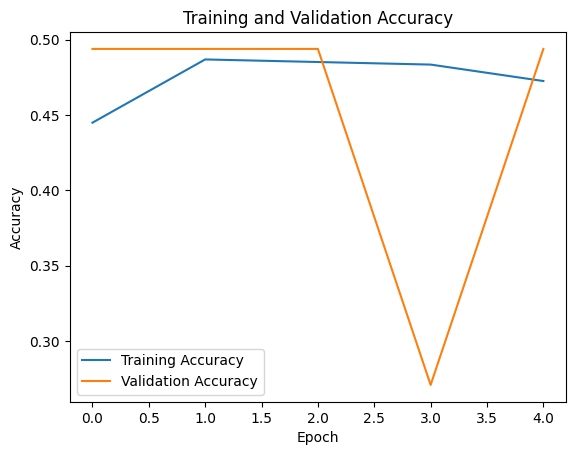

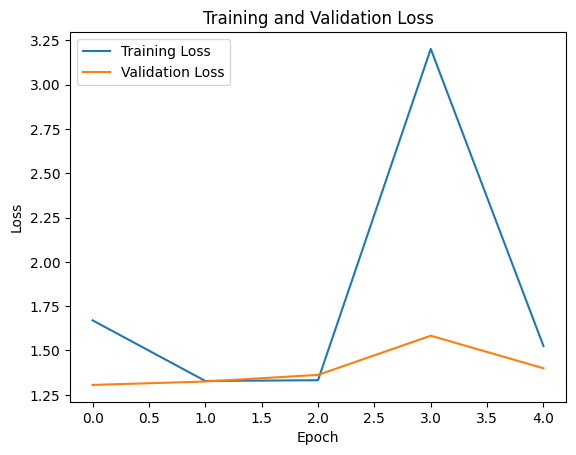

23/23 [==============================] - 5s 194ms/step


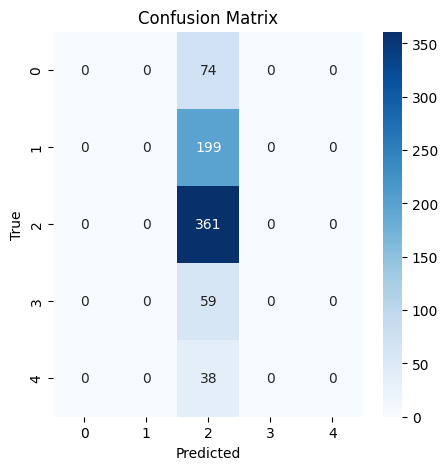

Classification Report
                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        74
      Moderate       0.00      0.00      0.00       199
         No_DR       0.49      1.00      0.66       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.49       731
     macro avg       0.10      0.20      0.13       731
  weighted avg       0.24      0.49      0.33       731



In [ ]:
# Define VGG16 model
vgg_model = VGG16(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.Flatten()(vgg_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

vgg_model = tf.keras.Model(inputs=vgg_model.inputs, outputs=output_layer)

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg_history = vgg_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(vgg_history)
plot_confusion_matrix(vgg_model, validation_generator)


CNN MODEL

Epoch 1/30
92/92 [==============================] - 44s 466ms/step - loss: 1.2391 - accuracy: 0.5114 - val_loss: 1.1330 - val_accuracy: 0.5349
Epoch 2/30
92/92 [==============================] - 43s 467ms/step - loss: 1.0947 - accuracy: 0.5851 - val_loss: 1.0024 - val_accuracy: 0.5923
Epoch 3/30
92/92 [==============================] - 43s 462ms/step - loss: 1.0172 - accuracy: 0.6302 - val_loss: 0.9150 - val_accuracy: 0.6580
Epoch 4/30
92/92 [==============================] - 43s 463ms/step - loss: 0.9633 - accuracy: 0.6547 - val_loss: 0.9216 - val_accuracy: 0.6662
Epoch 5/30
92/92 [==============================] - 43s 461ms/step - loss: 0.9398 - accuracy: 0.6615 - val_loss: 0.9229 - val_accuracy: 0.6676
Epoch 6/30
92/92 [==============================] - 43s 462ms/step - loss: 0.9275 - accuracy: 0.6643 - val_loss: 0.8752 - val_accuracy: 0.6936
Epoch 7/30
92/92 [==============================] - 43s 462ms/step - loss: 0.8868 - accuracy: 0.6759 - val_loss: 0.8968 - val_accuracy: 0.6662

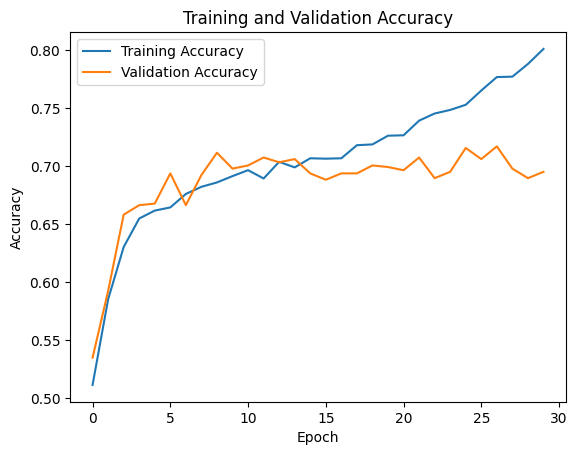

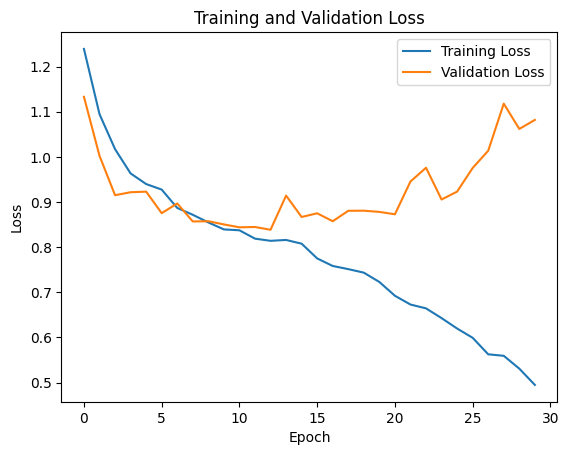

23/23 [==============================] - 4s 184ms/step


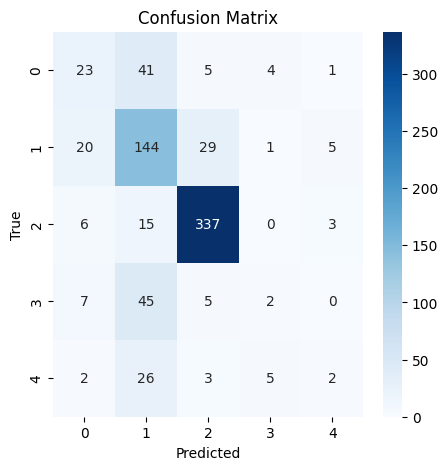

Classification Report
                precision    recall  f1-score   support

          Mild       0.40      0.31      0.35        74
      Moderate       0.53      0.72      0.61       199
         No_DR       0.89      0.93      0.91       361
Proliferate_DR       0.17      0.03      0.06        59
        Severe       0.18      0.05      0.08        38

      accuracy                           0.69       731
     macro avg       0.43      0.41      0.40       731
  weighted avg       0.65      0.69      0.66       731



In [ ]:
# Define custom CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size + (3,)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=30)

# Plot history and confusion matrix
plot_history(cnn_history)
plot_confusion_matrix(cnn_model, validation_generator)


ViT Model

347502902/347502902 [==============================] - 5s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


Epoch 1/5
92/92 [==============================] - 211s 2s/step - loss: 1.4791 - accuracy: 0.4654 - val_loss: 1.2390 - val_accuracy: 0.4938
Epoch 2/5
92/92 [==============================] - 139s 2s/step - loss: 1.2770 - accuracy: 0.4603 - val_loss: 1.2148 - val_accuracy: 0.4938
Epoch 3/5
92/92 [==============================] - 130s 1s/step - loss: 1.2437 - accuracy: 0.4739 - val_loss: 1.2392 - val_accuracy: 0.4938
Epoch 4/5
92/92 [==============================] - 130s 1s/step - loss: 1.2357 - accuracy: 0.4841 - val_loss: 1.2043 - val_accuracy: 0.4952
Epoch 5/5
92/92 [==============================] - 130s 1s/step - loss: 1.2225 - accuracy: 0.4664 - val_loss: 1.2286 - val_accuracy: 0.4911


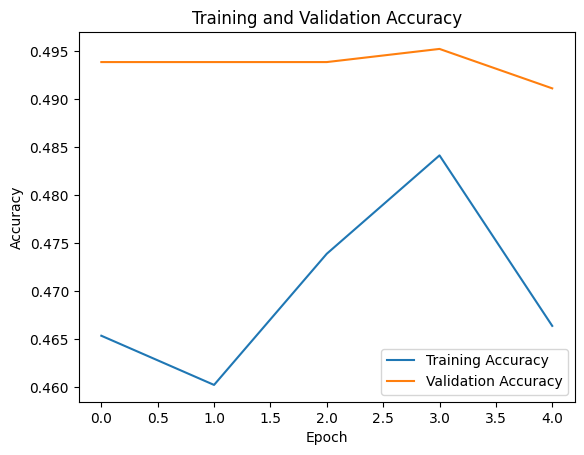

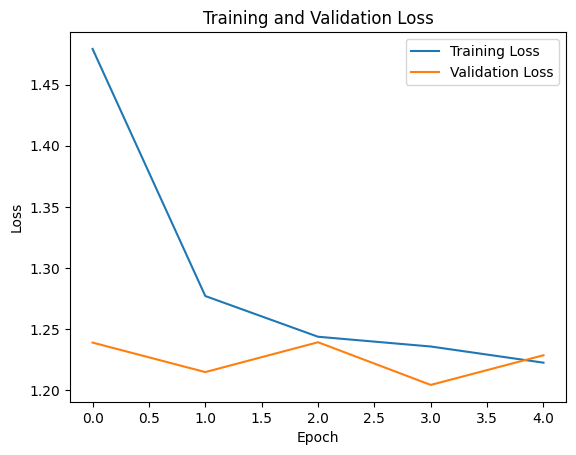

23/23 [==============================] - 13s 423ms/step


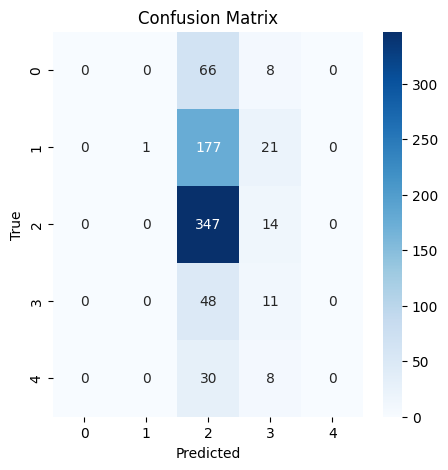

Classification Report
                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        74
      Moderate       1.00      0.01      0.01       199
         No_DR       0.52      0.96      0.67       361
Proliferate_DR       0.18      0.19      0.18        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.49       731
     macro avg       0.34      0.23      0.17       731
  weighted avg       0.54      0.49      0.35       731



In [ ]:
# Define ViT model
vit_model = vit.vit_b16(
    image_size=image_size,
    pretrained=True,
    include_top=True,
    pretrained_top=False
)

vit_model = tf.keras.Model(inputs=vit_model.inputs, outputs=vit_model.layers[-2].output)

# Add a new classification layer
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(vit_model.output)

# Define the new model
vi_model = tf.keras.Model(inputs=vit_model.inputs, outputs=output_layer)

# Compile the model
vi_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = vi_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(history)
plot_confusion_matrix(vi_model, validation_generator)

EfficientNet model

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 76s 416ms/step - loss: 0.9161 - accuracy: 0.6759 - val_loss: 1.7986 - val_accuracy: 0.2722
Epoch 2/5
92/92 [==============================] - 30s 322ms/step - loss: 0.7145 - accuracy: 0.7356 - val_loss: 1.3540 - val_accuracy: 0.4938
Epoch 3/5
92/92 [==============================] - 30s 323ms/step - loss: 0.6403 - accuracy: 0.7673 - val_loss: 1.3757 - val_accuracy: 0.4938
Epoch 4/5
92/92 [==============================] - 30s 320ms/step - loss: 0.5621 - accuracy: 0.7922 - val_loss: 1.6797 - val_accuracy: 0.2722
Epoch 5/5
92/92 [==============================] - 30s 320ms/step - loss: 0.5349 - accuracy: 0.8100 - val_loss: 2.5144 - val_accuracy: 0.0520


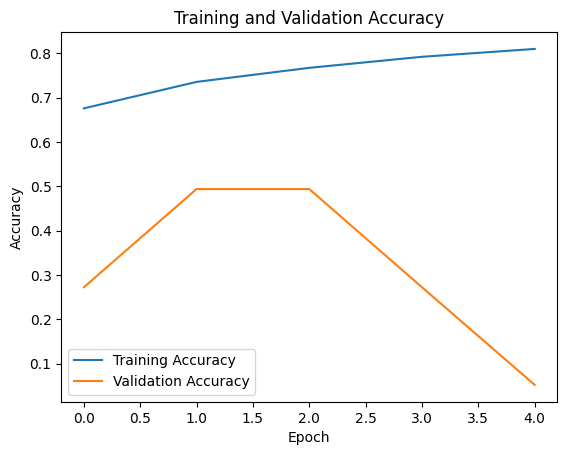

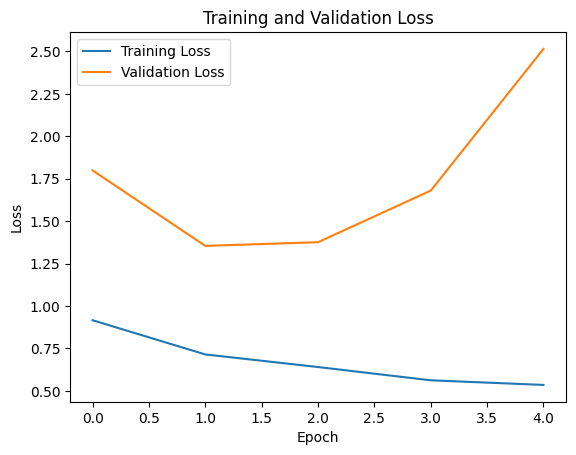

23/23 [==============================] - 7s 235ms/step


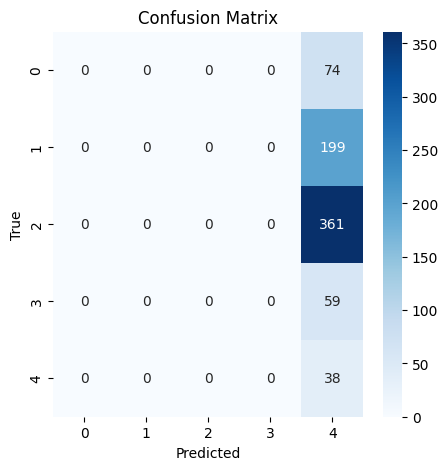

Classification Report
                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        74
      Moderate       0.00      0.00      0.00       199
         No_DR       0.00      0.00      0.00       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.05      1.00      0.10        38

      accuracy                           0.05       731
     macro avg       0.01      0.20      0.02       731
  weighted avg       0.00      0.05      0.01       731



In [ ]:
# Define EfficientNet model
efficientnet_model = EfficientNetB0(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(efficientnet_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

efficientnet_model = tf.keras.Model(inputs=efficientnet_model.inputs, outputs=output_layer)

# Compile the model
efficientnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
efficientnet_history = efficientnet_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(efficientnet_history)
plot_confusion_matrix(efficientnet_model, validation_generator)


InceptionV3 model

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 73s 378ms/step - loss: 1.0123 - accuracy: 0.6646 - val_loss: 9.1839 - val_accuracy: 0.4952
Epoch 2/5
92/92 [==============================] - 28s 298ms/step - loss: 0.8188 - accuracy: 0.7161 - val_loss: 1.5647 - val_accuracy: 0.5417
Epoch 3/5
92/92 [==============================] - 28s 298ms/step - loss: 0.7758 - accuracy: 0.7257 - val_loss: 0.9017 - val_accuracy: 0.6772
Epoch 4/5
92/92 [==============================] - 28s 300ms/step - loss: 0.7347 - accuracy: 0.7441 - val_loss: 0.9295 - val_accuracy: 0.6662
Epoch 5/5
92/92 [==============================] - 28s 298ms/step - loss: 0.7152 - accuracy: 0.7540 - val_loss: 0.9474 - val_accuracy: 0.6279


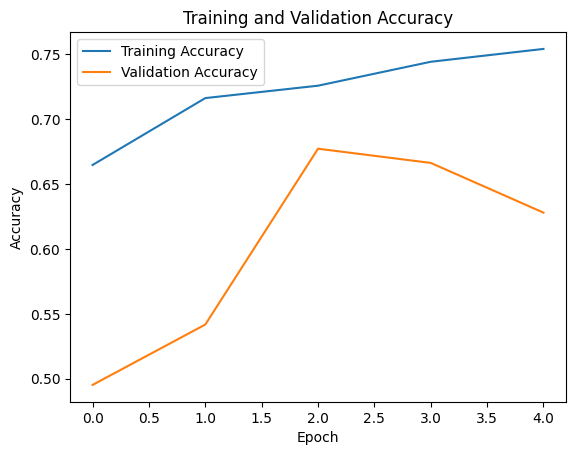

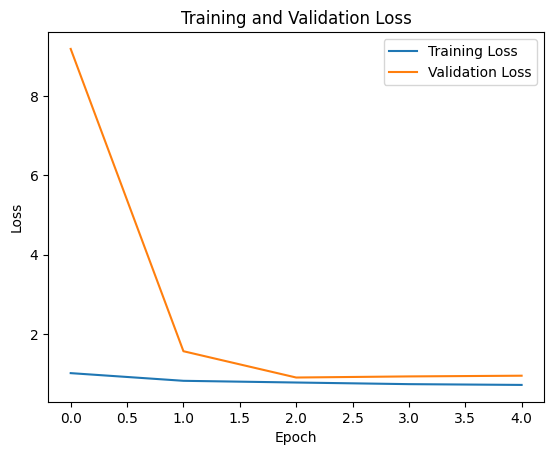

23/23 [==============================] - 7s 214ms/step


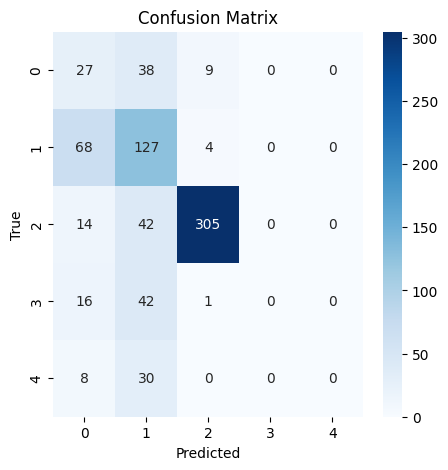

Classification Report
                precision    recall  f1-score   support

          Mild       0.20      0.36      0.26        74
      Moderate       0.46      0.64      0.53       199
         No_DR       0.96      0.84      0.90       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.63       731
     macro avg       0.32      0.37      0.34       731
  weighted avg       0.62      0.63      0.61       731



In [ ]:
# Define InceptionV3 model
inception_model = InceptionV3(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(inception_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

inception_model = tf.keras.Model(inputs=inception_model.inputs, outputs=output_layer)

# Compile the model
inception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
inception_history = inception_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(inception_history)
plot_confusion_matrix(inception_model, validation_generator)


MobileNet

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 562s 6s/step - loss: 0.9410 - accuracy: 0.6708 - val_loss: 2.0832 - val_accuracy: 0.5417
Epoch 2/5
92/92 [==============================] - 23s 248ms/step - loss: 0.7125 - accuracy: 0.7404 - val_loss: 0.8128 - val_accuracy: 0.7223
Epoch 3/5
92/92 [==============================] - 24s 262ms/step - loss: 0.6207 - accuracy: 0.7666 - val_loss: 0.6744 - val_accuracy: 0.7524
Epoch 4/5
92/92 [==============================] - 24s 260ms/step - loss: 0.5338 - accuracy: 0.7905 - val_loss: 1.0021 - val_accuracy: 0.7633
Epoch 5/5
92/92 [==============================] - 24s 258ms/step - loss: 0.5182 - accuracy: 0.8076 - val_loss: 0.7004 - val_accuracy: 0.7332


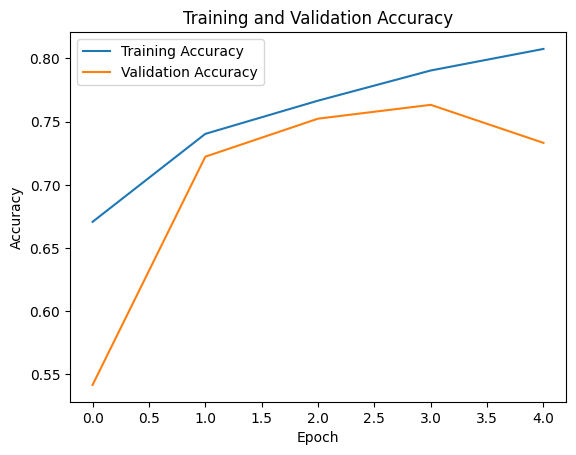

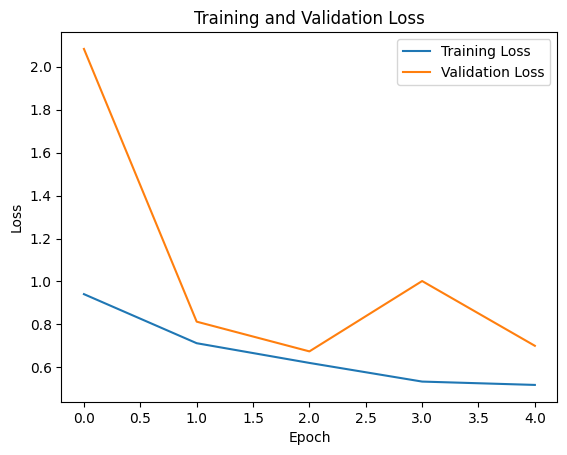

23/23 [==============================] - 5s 220ms/step


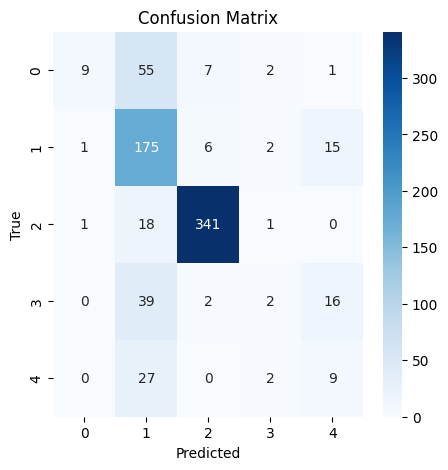

Classification Report
                precision    recall  f1-score   support

          Mild       0.82      0.12      0.21        74
      Moderate       0.56      0.88      0.68       199
         No_DR       0.96      0.94      0.95       361
Proliferate_DR       0.22      0.03      0.06        59
        Severe       0.22      0.24      0.23        38

      accuracy                           0.73       731
     macro avg       0.56      0.44      0.43       731
  weighted avg       0.74      0.73      0.69       731



In [ ]:
from tensorflow.keras.applications import MobileNet

# Define MobileNet model
mobilenet_model = MobileNet(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

mobilenet_model = tf.keras.Model(inputs=mobilenet_model.inputs, outputs=output_layer)

# Compile the model
mobilenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mobilenet_history = mobilenet_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(mobilenet_history)
plot_confusion_matrix(mobilenet_model, validation_generator)

DenseNet-121

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 100s 465ms/step - loss: 1.0011 - accuracy: 0.6448 - val_loss: 2.0742 - val_accuracy: 0.4254
Epoch 2/5
92/92 [==============================] - 39s 417ms/step - loss: 0.8223 - accuracy: 0.7103 - val_loss: 2.0327 - val_accuracy: 0.4665
Epoch 3/5
92/92 [==============================] - 40s 429ms/step - loss: 0.7602 - accuracy: 0.7387 - val_loss: 1.1326 - val_accuracy: 0.6826
Epoch 4/5
92/92 [==============================] - 38s 412ms/step - loss: 0.7269 - accuracy: 0.7400 - val_loss: 1.1419 - val_accuracy: 0.7004
Epoch 5/5
92/92 [==============================] - 38s 416ms/step - loss: 0.6827 - accuracy: 0.7475 - val_loss: 0.8325 - val_accuracy: 0.7250


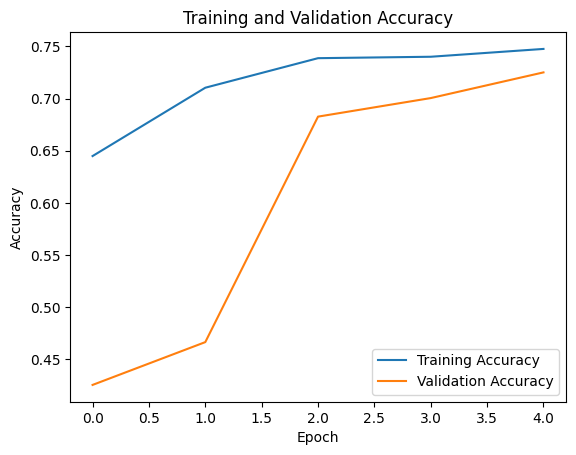

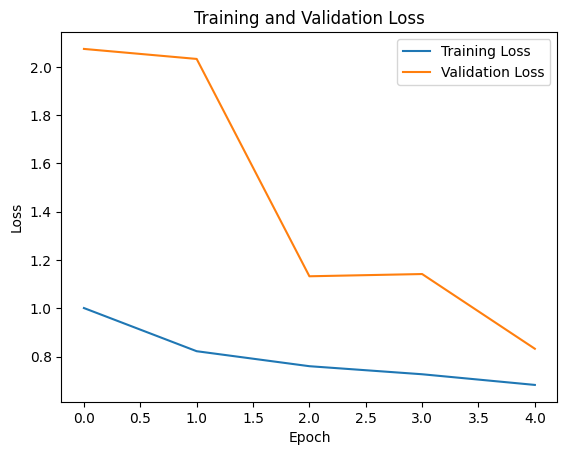

23/23 [==============================] - 7s 206ms/step


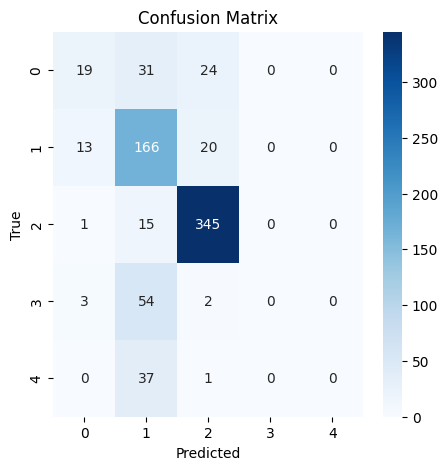

Classification Report
                precision    recall  f1-score   support

          Mild       0.53      0.26      0.35        74
      Moderate       0.55      0.83      0.66       199
         No_DR       0.88      0.96      0.92       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.73       731
     macro avg       0.39      0.41      0.38       731
  weighted avg       0.64      0.73      0.67       731



In [ ]:
from tensorflow.keras.applications import DenseNet121

# Define DenseNet-121 model
densenet121_model = DenseNet121(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(densenet121_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

densenet121_model = tf.keras.Model(inputs=densenet121_model.inputs, outputs=output_layer)

# Compile the model
densenet121_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
densenet121_history = densenet121_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(densenet121_history)
plot_confusion_matrix(densenet121_model, validation_generator)

XceptionNet

Epoch 1/5
92/92 [==============================] - 84s 609ms/step - loss: 0.8968 - accuracy: 0.6899 - val_loss: 2.2679 - val_accuracy: 0.5349
Epoch 2/5
92/92 [==============================] - 51s 552ms/step - loss: 0.6822 - accuracy: 0.7441 - val_loss: 0.9988 - val_accuracy: 0.7319
Epoch 3/5
92/92 [==============================] - 50s 543ms/step - loss: 0.6240 - accuracy: 0.7704 - val_loss: 1.1440 - val_accuracy: 0.7483
Epoch 4/5
92/92 [==============================] - 51s 549ms/step - loss: 0.5416 - accuracy: 0.7967 - val_loss: 0.8438 - val_accuracy: 0.7551
Epoch 5/5
92/92 [==============================] - 51s 552ms/step - loss: 0.4760 - accuracy: 0.8270 - val_loss: 0.9120 - val_accuracy: 0.7223


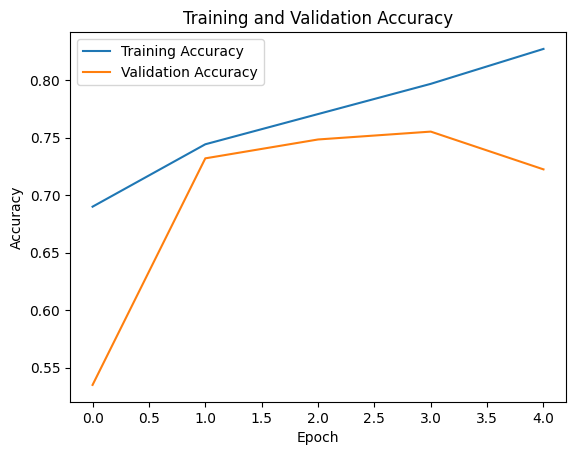

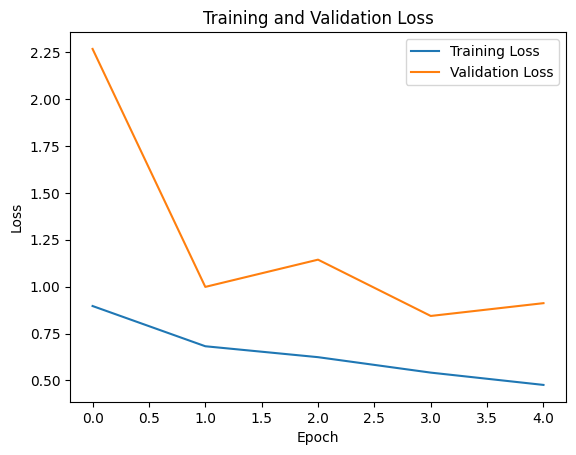

23/23 [==============================] - 6s 230ms/step


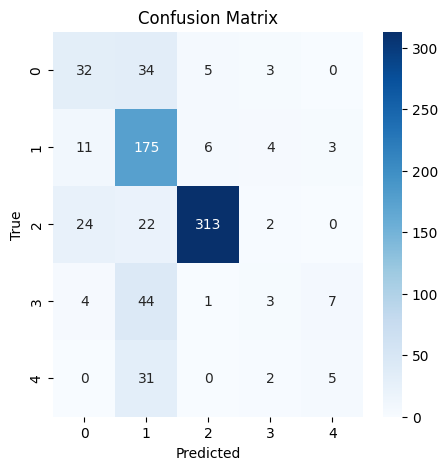

Classification Report
                precision    recall  f1-score   support

          Mild       0.45      0.43      0.44        74
      Moderate       0.57      0.88      0.69       199
         No_DR       0.96      0.87      0.91       361
Proliferate_DR       0.21      0.05      0.08        59
        Severe       0.33      0.13      0.19        38

      accuracy                           0.72       731
     macro avg       0.51      0.47      0.46       731
  weighted avg       0.71      0.72      0.70       731



In [ ]:
from tensorflow.keras.applications import Xception

# Define XceptionNet model
xception_model = Xception(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(xception_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

xception_model = tf.keras.Model(inputs=xception_model.inputs, outputs=output_layer)

# Compile the model
xception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
xception_history = xception_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(xception_history)
plot_confusion_matrix(xception_model, validation_generator)

DenseNet-169

51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 168s 718ms/step - loss: 1.0234 - accuracy: 0.6387 - val_loss: 10.6709 - val_accuracy: 0.4938
Epoch 2/5
92/92 [==============================] - 47s 506ms/step - loss: 0.8283 - accuracy: 0.7114 - val_loss: 1.2192 - val_accuracy: 0.5677
Epoch 3/5
92/92 [==============================] - 48s 520ms/step - loss: 0.7824 - accuracy: 0.7168 - val_loss: 1.1711 - val_accuracy: 0.6580
Epoch 4/5
92/92 [==============================] - 46s 500ms/step - loss: 0.7216 - accuracy: 0.7393 - val_loss: 1.0244 - val_accuracy: 0.7237
Epoch 5/5
92/92 [==============================] - 46s 498ms/step - loss: 0.6813 - accuracy: 0.7612 - val_loss: 0.7162 - val_accuracy: 0.7401


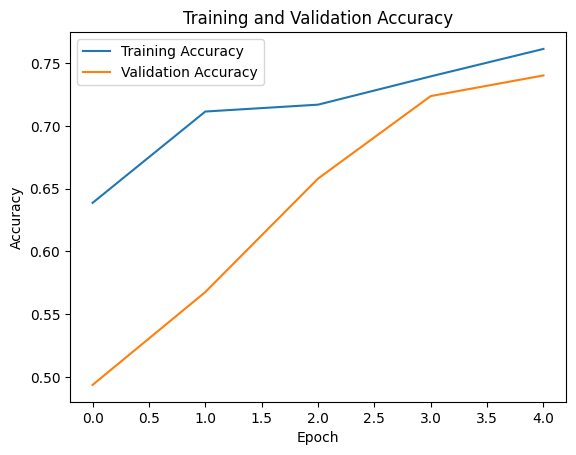

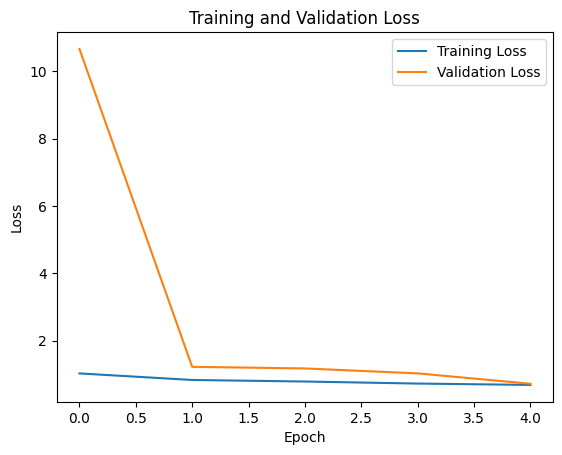

23/23 [==============================] - 8s 220ms/step


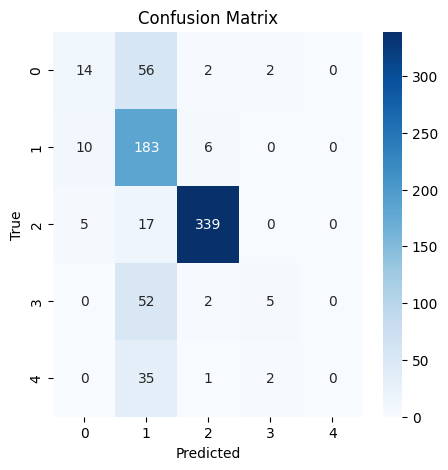

Classification Report
                precision    recall  f1-score   support

          Mild       0.48      0.19      0.27        74
      Moderate       0.53      0.92      0.68       199
         No_DR       0.97      0.94      0.95       361
Proliferate_DR       0.56      0.08      0.15        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.74       731
     macro avg       0.51      0.43      0.41       731
  weighted avg       0.72      0.74      0.69       731



In [ ]:
from tensorflow.keras.applications import DenseNet169

# Define DenseNet-169 model
densenet169_model = DenseNet169(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(densenet169_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

densenet169_model = tf.keras.Model(inputs=densenet169_model.inputs, outputs=output_layer)

# Compile the model
densenet169_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
densenet169_history = densenet169_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(densenet169_history)
plot_confusion_matrix(densenet169_model, validation_generator)

Swin Transformer

In [22]:
!pip install transformers

In [23]:
import tensorflow as tf
from transformers import TFSwinModel, SwinConfig, AdamW
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define Swin Transformer model
config = SwinConfig.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
swin_transformer_model = TFSwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224", config=config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFSwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFSwinModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSwinModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFSwinModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoi

In [24]:
from tensorflow_addons.optimizers import AdamW

# Initialize AdamW optimizer with both learning_rate and weight_decay
optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-5)

In [25]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model

# Define the complete model
inputs = Input(shape=(224, 224, 3))
# Transpose the input to match the expected shape (batch_size, num_channels, height, width)
transposed_inputs = tf.transpose(inputs, perm=[0, 3, 1, 2])
swin_outputs = swin_transformer_model(pixel_values=transposed_inputs)[0]
x = GlobalAveragePooling1D()(swin_outputs)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [26]:
# Use the AdamW optimizer with learning rate and weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-5)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
92/92 [==============================] - 1638s 18s/step - loss: 0.9788 - accuracy: 0.6414 - val_loss: 0.7983 - val_accuracy: 0.6977
Epoch 2/5
92/92 [==============================] - 29s 310ms/step - loss: 0.7317 - accuracy: 0.7301 - val_loss: 0.7269 - val_accuracy: 0.7237
Epoch 3/5
92/92 [==============================] - 29s 310ms/step - loss: 0.6631 - accuracy: 0.7410 - val_loss: 0.6790 - val_accuracy: 0.7524
Epoch 4/5
92/92 [==============================] - 28s 307ms/step - loss: 0.6102 - accuracy: 0.7694 - val_loss: 0.6723 - val_accuracy: 0.7551
Epoch 5/5
92/92 [==============================] - 28s 308ms/step - loss: 0.5783 - accuracy: 0.7827 - val_loss: 0.6836 - val_accuracy: 0.7442


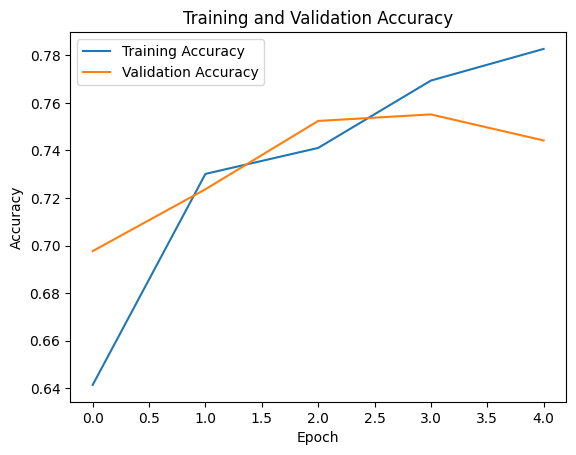

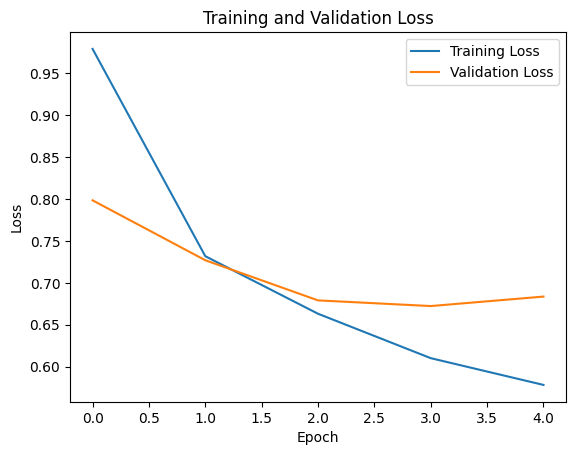

23/23 [==============================] - 11s 235ms/step


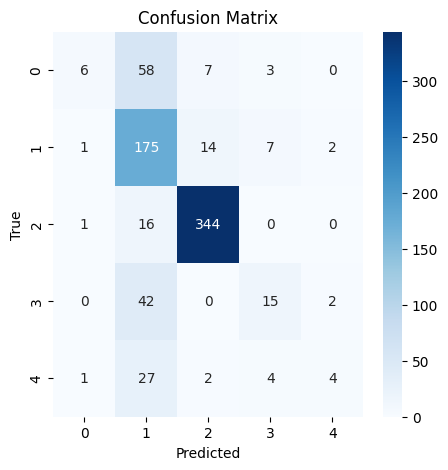

Classification Report
                precision    recall  f1-score   support

          Mild       0.67      0.08      0.14        74
      Moderate       0.55      0.88      0.68       199
         No_DR       0.94      0.95      0.95       361
Proliferate_DR       0.52      0.25      0.34        59
        Severe       0.50      0.11      0.17        38

      accuracy                           0.74       731
     macro avg       0.63      0.45      0.46       731
  weighted avg       0.75      0.74      0.70       731



In [27]:
# Train the model
history_swinT = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

# Plot history and confusion matrix
plot_history(history_swinT)
plot_confusion_matrix(model, validation_generator)

ResNet50

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/5
92/92 [==============================] - 82s 476ms/step - loss: 1.1679 - accuracy: 0.6182 - val_loss: 1.7982 - val_accuracy: 0.1012
Epoch 2/5
92/92 [==============================] - 37s 400ms/step - loss: 0.8736 - accuracy: 0.7021 - val_loss: 12.1870 - val_accuracy: 0.2722
Epoch 3/5
92/92 [==============================] - 37s 396ms/step - loss: 0.7715 - accuracy: 0.7339 - val_loss: 1.5742 - val_accuracy: 0.1012
Epoch 4/5
92/92 [==============================] - 37s 399ms/step - loss: 0.7061 - accuracy: 0.7427 - val_loss: 1.6908 - val_accuracy: 0.1012
Epoch 5/5
92/92 [==============================] - 37s 398ms/step - loss: 0.6706 - accuracy: 0.7424 - val_loss: 2.5799 - val_accuracy: 0.1012


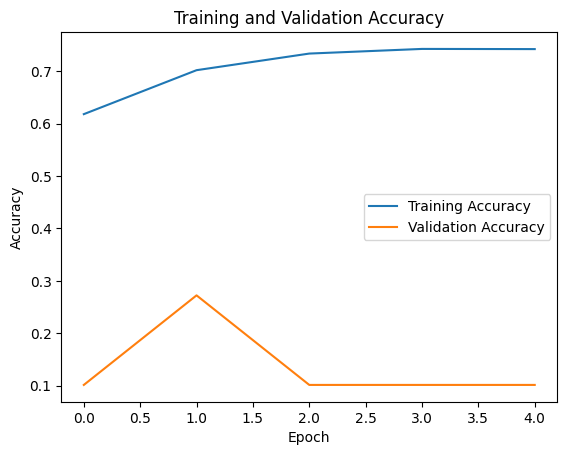

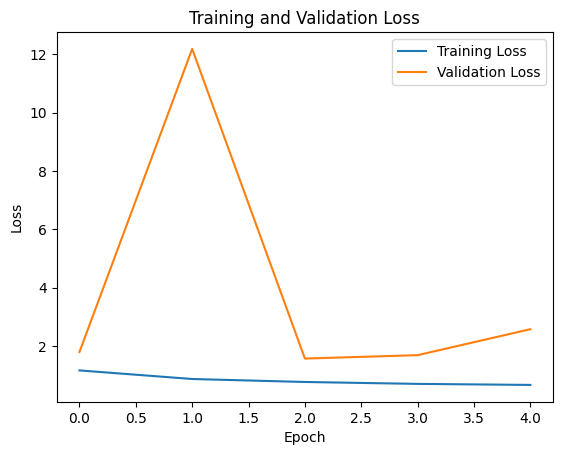

23/23 [==============================] - 6s 217ms/step


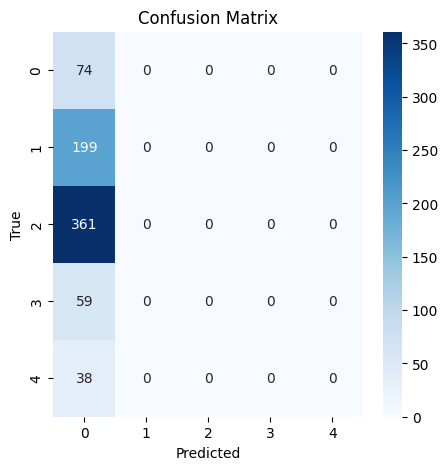

Classification Report
                precision    recall  f1-score   support

          Mild       0.10      1.00      0.18        74
      Moderate       0.00      0.00      0.00       199
         No_DR       0.00      0.00      0.00       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.10       731
     macro avg       0.02      0.20      0.04       731
  weighted avg       0.01      0.10      0.02       731



In [ ]:
from tensorflow.keras.applications import ResNet50

# Define ResNet50 model
resnet_model = ResNet50(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

resnet_model = tf.keras.Model(inputs=resnet_model.inputs, outputs=output_layer)

# Compile the model
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet_history = resnet_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(resnet_history)
plot_confusion_matrix(resnet_model, validation_generator)

InceptionResV2

219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/5
92/92 [==============================] - 163s 752ms/step - loss: 0.9162 - accuracy: 0.6858 - val_loss: 1.4468 - val_accuracy: 0.4774
Epoch 2/5
92/92 [==============================] - 56s 607ms/step - loss: 0.7107 - accuracy: 0.7390 - val_loss: 1.5832 - val_accuracy: 0.6744
Epoch 3/5
92/92 [==============================] - 56s 610ms/step - loss: 0.6531 - accuracy: 0.7571 - val_loss: 0.7024 - val_accuracy: 0.7606
Epoch 4/5
92/92 [==============================] - 56s 602ms/step - loss: 0.6152 - accuracy: 0.7728 - val_loss: 0.8111 - val_accuracy: 0.7305
Epoch 5/5
92/92 [==============================] - 56s 610ms/step - loss: 0.5787 - accuracy: 0.7782 - val_loss: 0.8955 - val_accuracy: 0.7141


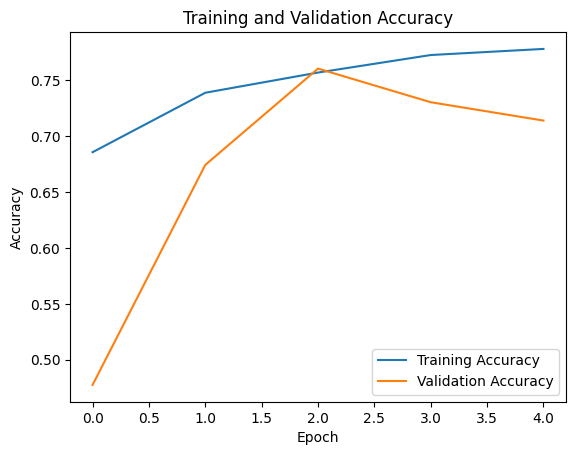

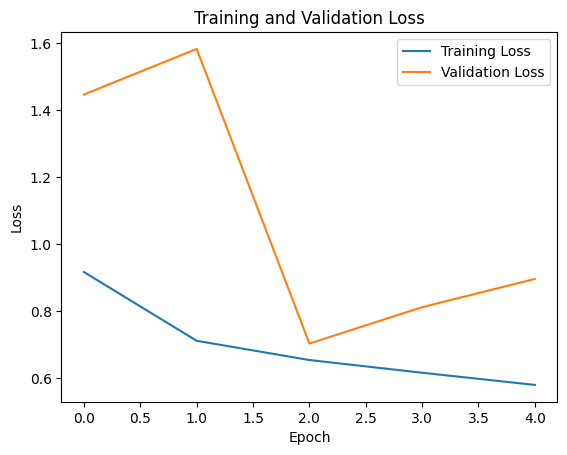

23/23 [==============================] - 9s 257ms/step


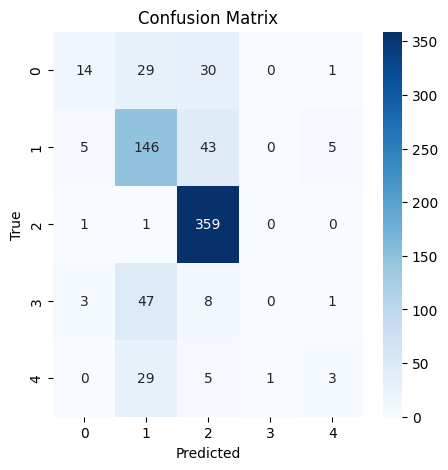

Classification Report
                precision    recall  f1-score   support

          Mild       0.61      0.19      0.29        74
      Moderate       0.58      0.73      0.65       199
         No_DR       0.81      0.99      0.89       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.30      0.08      0.12        38

      accuracy                           0.71       731
     macro avg       0.46      0.40      0.39       731
  weighted avg       0.63      0.71      0.65       731



In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

# Define InceptionResNetV2 model
inception_model = InceptionResNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers
x = tf.keras.layers.GlobalAveragePooling2D()(inception_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

inceptionR_model = tf.keras.Model(inputs=inception_model.inputs, outputs=output_layer)

# Compile the model
inceptionR_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
inception_history = inceptionR_model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Plot history and confusion matrix
plot_history(inception_history)
plot_confusion_matrix(inceptionR_model, validation_generator)